In [8]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

## Operacijski ojačevalnik - PID krmilnik

V analogni elektroniki se operacijski ojačevalniki uporabljajo za realizacijo PID krmilnikov. Medtem ko matematični modeli LTI sistemov predpostavljajo idealne pogoje, realna vezja tem pogojem ne ustrezajo v celoti.

V večini primerov idealen model vrne sprejemljive rezultate, a frekvenčne karakteristike bolje aproksimiramo z razširitvijo modela z vključitvijo odprtozančnega ojačanja operacijskega ojačevalnika:
<br><br>
$$G_{ideal}(s)=\frac{V_{out}}{V_{in}}=-\frac{Z_F}{Z_G}\qquad\qquad G_{approx}(s)=\frac{V_{out}}{V_{in}}=-\frac{\frac{-A\cdot Z_F}{Z_G+Z_F}}{1+\frac{A\cdot Z_G}{Z_G+Z_F}}$$
<br>

V tem interaktivnem primeru bodo prikazane nastavitve PID krmilnika z uporabo operacijskega ojačevalnika.
<br>
<b>Najprej izberi vrednost odprtozančnega ojačanja!</b>

<!-- In analog electronics, operational amplifiers are generally used for the realization of Proportional-Integral-Derivating (PID) controllers. While the mathematical model of Linear Time-invariant (LTI) systems assumes ideal conditions, the realistic circuits may not entirely match them.

In most cases, the ideal model returns acceptable results, but the frequency characteristics can be approximated better by expanding the model with the amplifier's open-loop gain:
<br><br>
$$G_{ideal}(s)=\frac{V_{out}}{V_{in}}=-\frac{Z_F}{Z_G}\qquad\qquad G_{approx}(s)=\frac{V_{out}}{V_{in}}=-\frac{\frac{-A\cdot Z_F}{Z_G+Z_F}}{1+\frac{A\cdot Z_G}{Z_G+Z_F}}$$
<br>

In this example, we'll explore some of the operational amplifier based PID controller configurations.<br>
<b>First, select an open-loop gain value for the calculations!</b> -->

In [9]:
# Model selector
style = {'description_width': 'initial'}
opampGain = w.ToggleButtons(
    options=[('2 000', 2000), ('10 000', 10000), ('50 000', 50000), ('200 000', 200000), ('500 000', 500000)],
    description='Ojačanje operacijskega ojačevalnika: ', style=style)

display(opampGain)

ToggleButtons(description='Ojačanje operacijskega ojačevalnika: ', options=(('2 000', 2000), ('10 000', 10000)…

Obstaja veliko izvedbenih različic PID krmilnika, a v splošnem le-te vključujejo uporovne elemente in kondenzatorje tako v direktni kot v povratni poti. V tem interaktivnem primeru direktna pot vsebuje zaporedno vezan par kondenzator-uporovni element, ki je vzporedno vezan z drugim uporovnim elementom, medtem ko povratna pot vsebuje še en zaporedno vezan par kondenzator-uporovni element.
<br><br>
<img src="Images/pid.png" width="30%" />
<br>
<b>Prilagodi izbiro pasivnih komponent tako, da bo realen (neidealen) model čim bliže idealnemu! Kje pride do pomembnega odstopanja realnih karakteristik od idealnih? Kaj lahko poveš o fazno-frekvenčnem delu Bodejevega diagrama?</b>

<!-- There is a wide variety of PID controller configurations, but they generally have to include capacitors and resistors both in the feedforward and the feedback path. In our example, the feedforward path contains a serially connected capacitor-resistor pair parallelly connected to a second resistor, while the feedback path consists of yet another serially connected capacitor-resistor pair.
<br><br>
<img src="Images/pid.png" width="30%" />
<br>
<b>Adjust the passive elektronskih components so that the non-ideal model is the closest to the ideal! Where do the characteristics significantly deviate from the ideal? What can be said about the phase plot?</b> -->

<IPython.core.display.Javascript object>


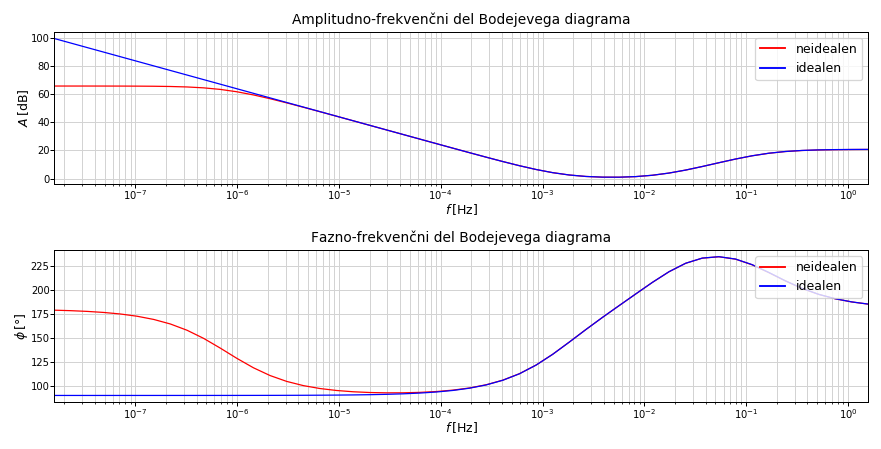

Output()

In [10]:
# Figure definition

fig1, ((f1_ax1), (f1_ax2)) = plt.subplots(2, 1, num='Slika 1')
fig1.set_size_inches((9.8, 5))
fig1.set_tight_layout(True)

l1 = f1_ax1.plot([], [], color='red')
l2 = f1_ax2.plot([], [], color='red') 
l3 = f1_ax1.plot([], [], color='blue')
l4 = f1_ax2.plot([], [], color='blue')  

f1_line1 = l1[0]
f1_line2 = l2[0]
f1_line3 = l3[0]
f1_line4 = l4[0]
    
f1_ax1.legend(l1+l3, ['neidealen', 'idealen'], loc=1)
f1_ax2.legend(l2+l4, ['neidealen', 'idealen'], loc=1)

f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax2.grid(which='both', axis='both', color='lightgray')

f1_ax1.autoscale(enable=True, axis='x', tight=True)
f1_ax2.autoscale(enable=True, axis='x', tight=True)
f1_ax1.autoscale(enable=True, axis='y', tight=False)
f1_ax2.autoscale(enable=True, axis='y', tight=False)

f1_ax1.set_title('Amplitudno-frekvenčni del Bodejevega diagrama', fontsize=11)
f1_ax1.set_xscale('log')
f1_ax1.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax1.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax2.set_title('Fazno-frekvenčni del Bodejevega diagrama', fontsize=11)
f1_ax2.set_xscale('log')
f1_ax2.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax2.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=10)
f1_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)  

# System model

def system_model(cg, r1, r2, cf, rf, a):

    Rf = rf / 1000      # Convert to Ohm
    R1 = r1 / 1000
    R2 = r2 / 1000
    Cf = cf * 1000000   # Convert to Farad
    Cg = cg * 1000000

    A = Rf*(R1+R2)*Cf*Cg
    B = Rf*Cf+(R1+R2)*Cg
    C = R1*R2*Cf*Cg
    D = Cf*R2
    
    W_ideal = c.tf([-A, -B, -1], [C, D, 0])
    W_ac = c.tf([-a*A, -a*B, -a], [A+(a+1)*C, B+(a+1)*D, 1])
    
    global f1_line1, f1_line2, f1_line3, f1_line4
    
    f1_ax1.lines.remove(f1_line1)
    f1_ax2.lines.remove(f1_line2)
    f1_ax1.lines.remove(f1_line3)
    f1_ax2.lines.remove(f1_line4)

    mag, phase, omega = c.bode_plot(W_ac, Plot=False)   # Non-ideal Bode-plot
    f1_line1, = f1_ax1.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='red')
    f1_line2, = f1_ax2.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='red') 
    
    mag, phase, omega = c.bode_plot(W_ideal, omega=omega, Plot=False)   # Ideal Bode-plot at the non-ideal points
    f1_line3, = f1_ax1.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f1_line4, = f1_ax2.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')   

    f1_ax1.relim()
    f1_ax2.relim()
    
    f1_ax1.autoscale_view()
    f1_ax2.autoscale_view()
    
    print('Prenosna funkcija idealnega PD krmilnika:')
    print(W_ideal)
    print('\nPrenosna funkcija realnega PD krmilnika:')
    print(W_ac)
    
# GUI widgets

cg_slider = w.FloatLogSlider(value=0.01, base=10, min=-3, max=3, description=r'$C_g\ [\mu H]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})    
r1_slider = w.FloatLogSlider(value=0.1, base=10, min=-3, max=3, description=r'$R_1\ [k\Omega]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})
r2_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$R_2\ [k\Omega]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})
cf_slider = w.FloatLogSlider(value=0.1, base=10, min=-3, max=3, description=r'$C_f\ [\mu H]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})
rf_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$R_f\ [k\Omega]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})

input_data = w.interactive_output(system_model, {'cg':cg_slider, 'r1':r1_slider, 'r2':r2_slider,
                                                 'cf':cf_slider, 'rf':rf_slider, 'a':opampGain})

display(w.VBox([w.HBox([cg_slider, r1_slider, r2_slider]),
                w.HBox([cf_slider, rf_slider])]), input_data)